In [3]:
import pandas as pd
import numpy as np
import re

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\dines\Downloads\archive (1)\Language Detection.csv")

In [6]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [8]:
df.isna().sum()

Text        0
Language    0
dtype: int64

In [14]:
lanlist = df["Language"].unique()

In [17]:
lanlist[0]

'English'

In [22]:
for l in lanlist:
    print(list(df[df["Language"] == l]["Text"])[0])
    print(" ")
print()

 Nature, in the broadest sense, is the natural, physical, material world or universe.
 
ഭൗതികപ്രപഞ്ചത്തെ മൊത്തത്തിൽ സൂചിപ്പിക്കുന്ന പദമാണ് പ്രകൃതി (ജർമൻ: Natur, ഫ്രഞ്ച്, ഇംഗ്ലീഷ്: Nature, സ്പാനിഷ്: Naturaleza, പോർച്ചുഗീസ്: Natureza).
 
विकि-शब्दकोष (एक मुक्त शब्दकोष एवं समानांतर कोष) 
 विकिताबें (मुफ़्त क़िताबें और उपयोगी सामग्री) 
 विकिक्वोट (विभिन्न सुभाषितों का संकलन) 
 विकिस्रोत (मुक्त स्त्रोत सामग्री) 
 कॉमंस (विकिमीडिया प्रकल्प का मीडिया फ़ाइल भंडार) 
 विकिसमाचार (मुक्त समाचार) योगदानकर्ताओं के लिए: यह लेख इंटरनेट (इण्टरनेट) विश्वकोश के बारे में बतलाता  है। कि विकिपीडिया के मुख्य पृष्ठ के लिए, विकिपीडिया का मुख्य पृष्ठ देखें। विकिपीडिया के आगंतुक परिचय के लिए, विकिपीडिया के बारे में पृष्ठ देखें। विकिपीडिया  एक मुफ्त,[5] वेब आधारित और सहयोगी बहुभाषी विश्वकोश है, जो गैर-लाभ विकिमीडिया फाउनडेशन से सहयोग प्राप्त परियोजना में उत्पन्न हुआ। इसका नाम दो शब्दों विकी (wiki) (यह सहयोगी वेबसाइटों के निर्माण की एक तकनीक है, यह एक हवाई शब्द विकी है जिसका अर्थ है "जल्दी") और एनसाइक्लोपीडिया (en

C:\Users\dines\anaconda3\envs\mlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


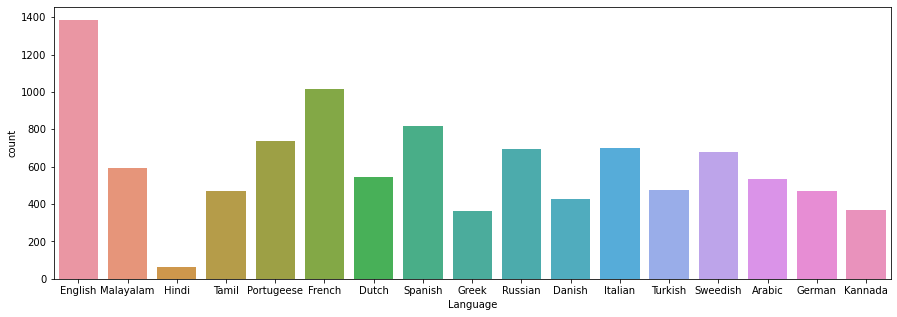

In [34]:
plt.figure(figsize=(15, 5))
plt.xticks([])
# plt.yticks([])
sns.countplot(df["Language"])
plt.show()

In [43]:
len(df)

10337

In [44]:
df["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [87]:
X = df["Text"]
y = df["Language"]

In [88]:
from sklearn.utils import shuffle

In [89]:
X, y = shuffle(X, y)

In [90]:
text = []
for t in X:
    t = t.lower()
    t = re.sub(r"[!@#$%^&*()[[]]:;'=-+_*0-9]", "", t)
    text.append(t)

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
le = LabelEncoder()
y = le.fit_transform(y)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
cv = CountVectorizer()
X = cv.fit_transform(text)

In [53]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,)

In [96]:
X.shape

(10337, 67109)

In [97]:
y.shape

(10337,)

In [98]:
from sklearn.naive_bayes import MultinomialNB

In [99]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [100]:
pred = mnb.predict(X_test)

In [102]:
pred

array([ 3,  3, 14, ...,  3,  4,  6])

In [101]:
y_test

array([ 3,  1, 14, ...,  2,  4,  6])

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [104]:
accuracy_score(pred, y_test)

0.8389748549323017

In [105]:
score = confusion_matrix(pred, y_test)

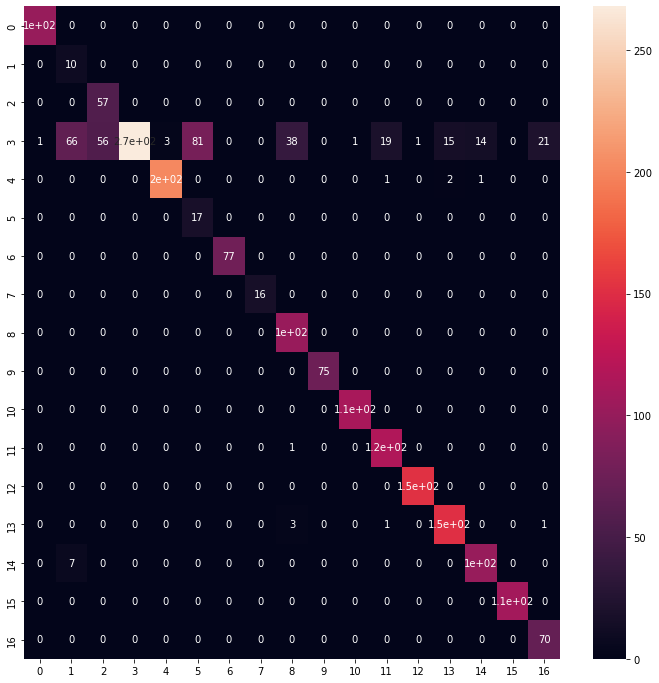

In [106]:
plt.figure(figsize=(12, 12))
sns.heatmap(score, annot=True)
plt.show()

In [77]:
df["Language"].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [107]:
texts = ["Hi there how are you", "ഞാൻ മലയാളികളെ സ്നേഹിക്കുന്നു.", "इस पृष्ठ पर इन्टरनेट पर उपलब्ध विभिन्न हिन्दी एवं देवनागरी सम्बंधित साधनों की कड़ियों की सूची है। इसमें ऑनलाइन एवं ऑफ़लाइन उपकरण (टूल्स) शामिल हैं।"
        "உறுப்புரை 1 மனிதப் பிறிவியினர் சகலரும் சுதந்திரமாகவே பிறக்கின்றனர்;", "O meu nome é or Me chamo…."]

In [110]:
for t in texts:
    print(le.inverse_transform(mnb.predict(cv.transform([t]))))

['English']
['Malayalam']
['Tamil']
['Portugeese']


# TFIDF

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
tfidf = TfidfVectorizer(ngram_range=(1, 3), analyzer="char")
X = tfidf.fit_transform(text)

In [ ]:
for t in texts:
    print(le.inverse_transform(mnb.predict(tfidf.transform([t]))))